##### What kind of cleaning steps did you perform?
##### How did you deal with missing values, if any?
##### Were there outliers, and how did you handle them?

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_identity = pd.read_csv('train_identity.csv')
df_transaction = pd.read_csv('train_transaction.csv')

##### 1] Updatig dataTypes of few to 'Category' type from 'Object' type.
##### 2] Mapping few values to Bool values and removing few null value data.
##### 3] Creating new column 'TransactionDay' which is derived from 'TransactionDT'.

In [4]:
df1 = df_identity.copy()
df2 = df_transaction.copy()

# The unique values for the below mentioned columns are 'Found' and 'NotFound'.
# Hence, making these columns datatype as 'Category'.
df1['id_12'] = pd.Categorical(values = df1['id_12'], categories = ['Found','NotFound'])
df1['id_15'] = pd.Categorical(values = df1['id_15'], categories = ['Found','NotFound','New'])
df1['id_16'] = pd.Categorical(values = df1['id_16'], categories = ['Found','NotFound'])
df1['id_27'] = pd.Categorical(values = df1['id_27'], categories = ['Found','NotFound'])
df1['id_28'] = pd.Categorical(values = df1['id_28'], categories = ['Found','NotFound','New'])
df1['id_29'] = pd.Categorical(values = df1['id_29'], categories = ['Found','NotFound'])

# For below mentioned columns updating the string values 'T' and 'F' to
# 'True' and 'False' respectively.
boolValues = {'T': True, 'F': False}
df1['id_35'] = df1['id_35'].map(boolValues)
df1['id_36'] = df1['id_36'].map(boolValues)
df1['id_37'] = df1['id_37'].map(boolValues)
df1['id_38'] = df1['id_38'].map(boolValues)

# Since, most of the columns have values as 'NaN' where 'id_35' is equal to 'NaN', hence
# removing those rows from the dataset. This removes only 2.25% of total data
#df1 = df1[df1['id_35'].notnull()]

# Replacing the NaN values of 'DeviceType' column with 'desktop' because as per analysis
# for the mentioned 'DeviceInfo' and its combination with column 'id_31', the device type is equal to 'desktop'
df1['DeviceType'].loc[df1['DeviceInfo'].isin(['Windows','rv:11.0','Trident/7.0'])] = 'desktop'

####################################################################################

# Adding new column TransactionDay by calculating the value from TransactionDT column
df2['TransactionDay']=(round(df2['TransactionDT']/60/60/24)).astype(int)


#### Creating main dataset by merging both the DataFrames created from two csv files

In [5]:
dataset = pd.merge(df2,df1,on='TransactionID',how='inner')

In [6]:
dataset.shape

(144233, 435)

In [7]:
train = df2.copy()

In [54]:
tD =train[['card1','TransactionID','D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','TransactionDay']]
trainD_melt = pd.melt(tD,id_vars =['card1','TransactionID'],var_name='Matches',value_name='Values')
trainD_pivot = pd.pivot_table(data=trainD_melt,index=['card1','TransactionID'],columns='Matches',values='Values')
trainD_pivot.head()

Matches                D1    D10  D11  D12  D13  D14    D2    D3     D4  \
card1 TransactionID                                                       
1000  3230924         0.0    0.0  NaN  5.0  5.0  0.0   NaN   NaN    5.0   
1001  3023634         0.0  310.0  0.0  NaN  NaN  NaN   NaN   NaN  310.0   
      3151336        30.0  340.0  NaN  NaN  NaN  NaN  30.0  30.0  340.0   
      3210739        51.0  360.0  NaN  NaN  NaN  NaN  51.0  20.0  360.0   
1004  3020767         0.0    NaN  NaN  NaN  NaN  NaN   NaN   NaN    NaN   

Matches                 D5   D6   D7          D8        D9  TransactionDay  
card1 TransactionID                                                         
1000  3230924          5.0  5.0  5.0    4.958333  0.958333            67.0  
1001  3023634        310.0  NaN  NaN         NaN       NaN            11.0  
      3151336         30.0  NaN  NaN         NaN       NaN            41.0  
      3210739         20.0  NaN  NaN         NaN       NaN            61.0  
1004  3020767          NaN  NaN  NaN  361.750000  0.750000            10.0

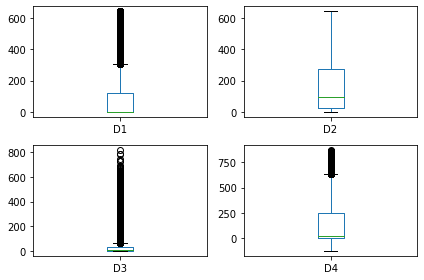

In [49]:
plt.subplot(2, 2, 1)
train['D1'].plot(kind='box')
plt.subplot(2, 2, 2)
train['D2'].plot(kind='box')
plt.subplot(2, 2, 3)
train['D3'].plot(kind='box')
plt.subplot(2, 2, 4)
train['D4'].plot(kind='box')

plt.tight_layout()

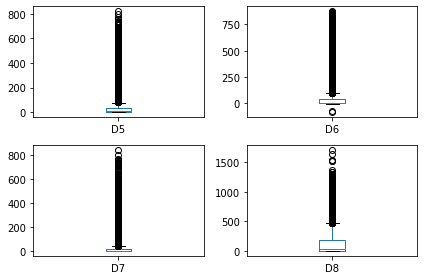

In [51]:
plt.subplot(2, 2, 1)
train['D5'].plot(kind='box')
plt.subplot(2, 2, 2)
train['D6'].plot(kind='box')
plt.subplot(2, 2, 3)
train['D7'].plot(kind='box')
plt.subplot(2, 2, 4)
train['D8'].plot(kind='box')
plt.tight_layout()

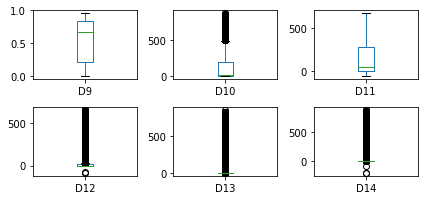

In [53]:
plt.subplot(3, 3, 1)
train['D9'].plot(kind='box')
plt.subplot(3, 3, 2)
train['D10'].plot(kind='box')
plt.subplot(3, 3, 3)
train['D11'].plot(kind='box')
plt.subplot(3, 3, 4)
train['D12'].plot(kind='box')
plt.subplot(3, 3, 5)
train['D13'].plot(kind='box')
plt.subplot(3, 3, 6)
train['D14'].plot(kind='box')
plt.tight_layout()

In [131]:
tC =train[['card1','TransactionID','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','TransactionDay']]
trainC_melt = pd.melt(tC,id_vars =['card1','TransactionID'],var_name='Matches',value_name='Values')
trainC_pivot = pd.pivot_table(data=trainC_melt,index=['card1','TransactionID'],columns='Matches',values='Values')
trainC_pivot.head()

Matches               C1  C10  C11  C12  C13  C14   C2   C3   C4   C5   C6  \
card1 TransactionID                                                          
1000  3230924        2.0  2.0  1.0  1.0  1.0  1.0  2.0  0.0  1.0  0.0  1.0   
1001  3023634        2.0  0.0  1.0  0.0  2.0  2.0  1.0  0.0  0.0  0.0  1.0   
      3151336        2.0  0.0  1.0  0.0  3.0  2.0  1.0  0.0  0.0  0.0  1.0   
      3210739        2.0  0.0  1.0  0.0  4.0  2.0  1.0  0.0  0.0  0.0  1.0   
1004  3020767        1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0   

Matches               C7   C8   C9  TransactionDay  
card1 TransactionID                                 
1000  3230924        1.0  1.0  0.0            67.0  
1001  3023634        0.0  0.0  1.0            11.0  
      3151336        0.0  0.0  1.0            41.0  
      3210739        0.0  0.0  1.0            61.0  
1004  3020767        0.0  1.0  0.0            10.0

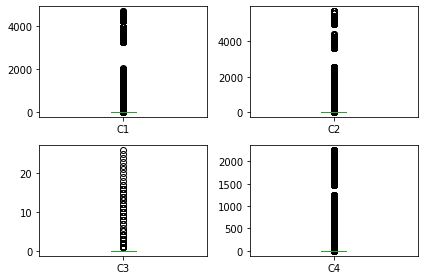

In [89]:
plt.subplot(2, 2, 1)
train['C1'].plot(kind='box')
plt.subplot(2, 2, 2)
train['C2'].plot(kind='box')
plt.subplot(2, 2, 3)
train['C3'].plot(kind='box')
plt.subplot(2, 2, 4)
train['C4'].plot(kind='box')

plt.tight_layout()

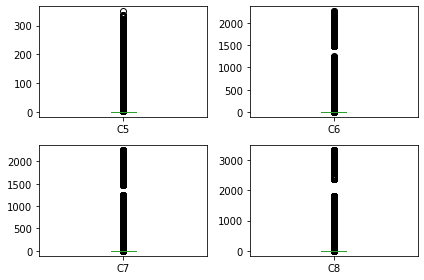

In [84]:
plt.subplot(2, 2, 1)
train['C5'].plot(kind='box')
plt.subplot(2, 2, 2)
train['C6'].plot(kind='box')
plt.subplot(2, 2, 3)
train['C7'].plot(kind='box')
plt.subplot(2, 2, 4)
train['C8'].plot(kind='box')
plt.tight_layout()

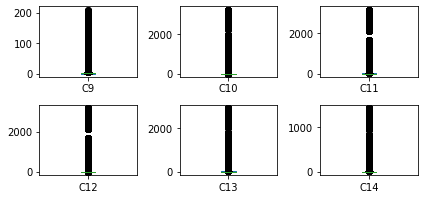

In [87]:
plt.subplot(3, 3, 1)
train['C9'].plot(kind='box')
plt.subplot(3, 3, 2)
train['C10'].plot(kind='box')
plt.subplot(3, 3, 3)
train['C11'].plot(kind='box')
plt.subplot(3, 3, 4)
train['C12'].plot(kind='box')
plt.subplot(3, 3, 5)
train['C13'].plot(kind='box')
plt.subplot(3, 3, 6)
train['C14'].plot(kind='box')
plt.tight_layout()

In [128]:
tM1 =train[['card1','TransactionID','M1','M2','M3','M4','M5','M6','M7','M8','M9']]
trainM_melt = pd.melt(tM1,id_vars =['card1','TransactionID'],var_name='Matches',value_name='Values')
trainM_melt.sort_values(['card1','TransactionID']).set_index(['card1','TransactionID','Matches']).head()

Values
card1 TransactionID Matches       
1000  3230924       M1         NaN
                    M2         NaN
                    M3         NaN
                    M4          M2
                    M5         NaN

##### Creating variables with specific list of column names

In [15]:
byC = ['TransactionID','isFraud','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','TransactionDay','card1','card2','card3','card4','card5','card6']
byD = ['TransactionID','isFraud','D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','TransactionDay','card1','card2','card3','card4','card5','card6']
byM = ['TransactionID','isFraud','M1','M2','M3','M4','M5','M6','M7','M8','M9','TransactionDay','card1','card2','card3','card4','card5','card6']
byID = list(df1.columns)

In [10]:
dataset[byC].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 23 columns):
TransactionID     144233 non-null int64
isFraud           144233 non-null int64
C1                144233 non-null float64
C2                144233 non-null float64
C3                144233 non-null float64
C4                144233 non-null float64
C5                144233 non-null float64
C6                144233 non-null float64
C7                144233 non-null float64
C8                144233 non-null float64
C9                144233 non-null float64
C10               144233 non-null float64
C11               144233 non-null float64
C12               144233 non-null float64
C13               144233 non-null float64
C14               144233 non-null float64
TransactionDay    144233 non-null int64
card1             144233 non-null int64
card2             143331 non-null float64
card3             144061 non-null float64
card4             144049 non-null object
card5           

In [11]:
dataset[byD].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 23 columns):
TransactionID     144233 non-null int64
isFraud           144233 non-null int64
D1                144015 non-null float64
D2                31116 non-null float64
D3                29059 non-null float64
D4                64768 non-null float64
D5                33075 non-null float64
D6                67373 non-null float64
D7                36140 non-null float64
D8                74926 non-null float64
D9                74926 non-null float64
D10               69232 non-null float64
D11               0 non-null float64
D12               58909 non-null float64
D13               61936 non-null float64
D14               62165 non-null float64
TransactionDay    144233 non-null int64
card1             144233 non-null int64
card2             143331 non-null float64
card3             144061 non-null float64
card4             144049 non-null object
card5             143277 non-null

In [12]:
dataset[byM].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 18 columns):
TransactionID     144233 non-null int64
isFraud           144233 non-null int64
M1                0 non-null object
M2                0 non-null object
M3                0 non-null object
M4                60831 non-null object
M5                0 non-null object
M6                0 non-null object
M7                0 non-null object
M8                0 non-null object
M9                0 non-null object
TransactionDay    144233 non-null int64
card1             144233 non-null int64
card2             143331 non-null float64
card3             144061 non-null float64
card4             144049 non-null object
card5             143277 non-null float64
card6             144055 non-null object
dtypes: float64(3), int64(4), object(11)
memory usage: 20.9+ MB


In [16]:
dataset[byID].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null category
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            129340 non-null category
id_16            129340 non-null category
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float6

In [129]:
d={}
for col in train.loc[:,'V1':'V339']:
    d[col] = train[col].unique()
d

{'V1': array([ 1., nan,  0.]),
 'V2': array([ 1., nan,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  8.]),
 'V3': array([ 1., nan,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  8.,  9.]),
 'V4': array([ 1., nan,  2.,  0.,  3.,  4.,  5.,  6.]),
 'V5': array([ 1., nan,  2.,  0.,  3.,  4.,  5.,  6.]),
 'V6': array([ 1., nan,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  9.,  8.]),
 'V7': array([ 1., nan,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  9.,  8.]),
 'V8': array([ 1., nan,  2.,  3.,  0.,  6.,  4.,  5.,  8.,  7.]),
 'V9': array([ 1., nan,  2.,  3.,  0.,  4.,  6.,  5.,  8.,  7.]),
 'V10': array([ 0., nan,  1.,  2.,  3.,  4.]),
 'V11': array([ 0., nan,  1.,  2.,  4.,  3.,  5.]),
 'V12': array([ 1.,  0., nan,  2.,  3.]),
 'V13': array([ 1.,  0., nan,  2.,  3.,  4.,  5.,  6.]),
 'V14': array([ 1., nan,  0.]),
 'V15': array([ 0., nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 'V16': array([ 0., nan,  1.,  2.,  3.,  4.,  5.,  6.,  8.,  9., 11.,  7., 10.,
        13., 14., 15.]),
 'V17': array([ 0., nan,  1.,  2.,  3.,  4.,  5.,

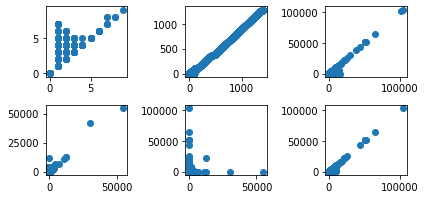

In [127]:
plt.subplot(3, 3, 1)
plt.scatter('V6','V7',data=train)
plt.subplot(3, 3, 2)
plt.scatter('V96','V102',data=train)
plt.subplot(3, 3, 3)
plt.scatter('V277','V278',data=train)
plt.subplot(3, 3, 4)
plt.scatter('V334','V335',data=train)
plt.subplot(3, 3, 5)
plt.scatter('V336','V337',data=train)
plt.subplot(3, 3, 6)
plt.scatter('V338','V339',data=train)
plt.tight_layout()
#166,269  291, 334,335--336,337,338,339

In [130]:
by = ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']
grouped = train.groupby(by, as_index=False)['TransactionID'].count()
grouped[grouped['TransactionID']==7].head(5)

,card1,card2,card3,card4,card5,card6,TransactionID
17,1021,555.0,150.0,visa,226.0,debit,7
49,1057,310.0,150.0,mastercard,224.0,debit,7
146,1189,555.0,150.0,visa,226.0,debit,7
148,1191,555.0,191.0,visa,102.0,credit,7
260,1323,268.0,150.0,visa,100.0,debit,7
